<a href="https://colab.research.google.com/github/soohyunnie/Human-Age-Detection/blob/main/baseline_cnn_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this notebook, we are going to model our data with dense layers and convolutional layers.

This was done in google colab so the directory for the images and folders are different than the other notebook.

First, we are going to unzip our split folder which contains train, validation, and test folders.

In [2]:
!unzip "/content/drive/My Drive/split3.zip"

Streaming output truncated to the last 5000 lines.
  inflating: split3/validation/age_0_20_imgs/1_0_0_20161219203503252.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_0_20161219205141196.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_0_20161219212409141.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_0_20161219212453942.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_0_20161220220135250.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_0_20161220223221043.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_0_20170103210905939.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_0_20170109191440780.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_0_20170109191445171.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_0_20170109194225586.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_0_20170110212555368.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_0_20170110212603790.jpg  
  inflating: split3/validation/age_0_20_imgs/1_0_

## Function

In [3]:
def plot_loss_accuracy(result):
    '''
    Plots accuracy and loss

    Parameter: result of the model

    Returns: loss plot and accuracy plot
    '''

    history = result.history

    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [4]:
# Make variables for the three folder directories
train_dir = 'split3/train'
validation_dir = 'split3/validation'
test_dir = 'split3/test'

We need to create a image generator for the images. We augmented the images to transform the images.

In [5]:
data_gen_aug = ImageDataGenerator(rescale=1./255, 
                                        rotation_range=30, 
                                        width_shift_range=.1, 
                                        height_shift_range=.1,
                                        horizontal_flip=True,
                                        zoom_range=0.1)
                                        
train_generator_aug = data_gen_aug.flow_from_directory(train_dir, target_size=(256, 256), batch_size=128)

validation_generator_aug = data_gen_aug.flow_from_directory(validation_dir, target_size=(256, 256), batch_size=128)

test_generator_aug = data_gen_aug.flow_from_directory(test_dir, target_size=(256, 256), batch_size=128)

Found 16000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
Found 3108 images belonging to 5 classes.


# Baseline Model

For our baseline model, we are going to use Dense Neural Networks with 5 layers including input and output layers. 

Before we start modeling, we need to reshape our images so it matches the shape for Dense Neural Networks.

In [12]:
train_imgs_aug, train_labels_aug = next(train_generator_aug)
validation_imgs_aug, validation_labels_aug = next(validation_generator_aug)
test_imgs_aug, test_labels_aug = next(test_generator_aug)

train_images_aug = train_imgs_aug.reshape(train_imgs_aug.shape[0], -1)
validation_images_aug = validation_imgs_aug.reshape(validation_imgs_aug.shape[0], -1)
test_images_aug = test_imgs_aug.reshape(test_imgs_aug.shape[0], -1)

print(train_images_aug.shape, validation_images_aug.shape, test_images_aug.shape)

(128, 196608) (128, 196608) (128, 196608)


In [13]:
baseline_model = models.Sequential()
baseline_model.add(Dense(128, activation='relu', input_shape=(196608,)))
baseline_model.add(Dense(64, activation='relu'))
baseline_model.add(Dense(32, activation='relu'))
baseline_model.add(Dense(16, activation='relu'))
baseline_model.add(Dense(5, activation='softmax'))

baseline_model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

baseline_result = baseline_model.fit(train_images_aug, train_labels_aug,
                                        epochs=20,
                                        batch_size=64,
                                        validation_data=(validation_images_aug, validation_labels_aug))

Epoch 1/20
2/2 [==============================] - 1s 332ms/step - loss: 5.2131 - accuracy: 0.2422 - val_loss: 24.1998 - val_accuracy: 0.2188
Epoch 2/20
2/2 [==============================] - 0s 78ms/step - loss: 24.7651 - accuracy: 0.2344 - val_loss: 21.7041 - val_accuracy: 0.1719
Epoch 3/20
2/2 [==============================] - 0s 80ms/step - loss: 26.4542 - accuracy: 0.1953 - val_loss: 18.3209 - val_accuracy: 0.1641
Epoch 4/20
2/2 [==============================] - 0s 73ms/step - loss: 14.0030 - accuracy: 0.1719 - val_loss: 9.5820 - val_accuracy: 0.2188
Epoch 5/20
2/2 [==============================] - 0s 82ms/step - loss: 8.8135 - accuracy: 0.2188 - val_loss: 6.2702 - val_accuracy: 0.2812
Epoch 6/20
2/2 [==============================] - 0s 74ms/step - loss: 9.6784 - accuracy: 0.1641 - val_loss: 13.2219 - val_accuracy: 0.2188
Epoch 7/20
2/2 [==============================] - 0s 78ms/step - loss: 11.5343 - accuracy: 0.2500 - val_loss: 11.4511 - val_accuracy: 0.2266
Epoch 8/20
2/2 [=

In [14]:
result_train_aug = baseline_model.evaluate(train_images_aug, train_labels_aug)
result_validation_aug = baseline_model.evaluate(validation_images_aug, validation_labels_aug)

print(result_train_aug, result_validation_aug)

4/4 [==============================] - 0s 8ms/step - loss: 2.2859 - accuracy: 0.2578
[1.6128551959991455, 0.40625] [2.285883665084839, 0.2578125]


The baseline model gave ~40% of accuracy on training data and ~26% on validation data. The model is definetely overfitting.

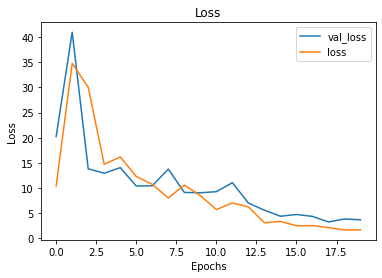

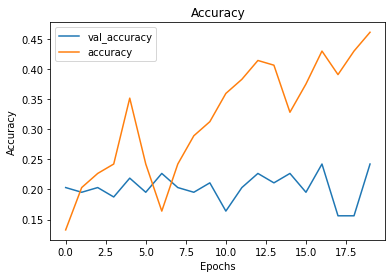

In [10]:
plot_loss_accuracy(baseline_result)

From the baseline model, you can see that the loss decreases as it goes through more epoch. Accuracy seems to spike frequently as it goes through more epoch.

Let's look at the confusion matrix for the baseline model.

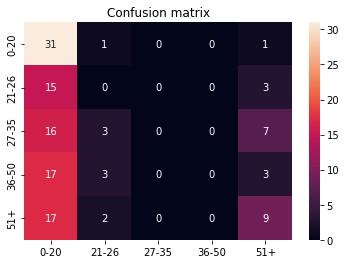

In [17]:
names = ['0-20', '21-26', '27-35', '36-50', '51+']

y_pred=baseline_model.predict(test_images_aug) 
y_pred=np.argmax(y_pred, axis=1)

y_test=np.argmax(test_labels_aug, axis=1)

CM = confusion_matrix(y_test, y_pred)

ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=names, 
           yticklabels=names, ax = ax,)
ax.set_title('Confusion matrix')
plt.show()

You can see that the model is prediting that the majority of the images are in age 0-20 (keep in mind that this model predicted only ~26% accurately).

# CNN

To increase the accuracy of the model, we are going to add convolutional layers.

In the first CNN model, we added 4 convolutional layers and 4 dense layers (including input and output layers).

In [6]:
cnn_model = models.Sequential()

cnn_model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(512, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(5, activation='softmax'))

cnn_model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_result = cnn_model.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 194s 4s/step - loss: 1.6090 - accuracy: 0.2107 - val_loss: 1.6061 - val_accuracy: 0.2022
Epoch 2/15
40/40 [==============================] - 168s 4s/step - loss: 1.6052 - accuracy: 0.2207 - val_loss: 1.5971 - val_accuracy: 0.2569
Epoch 3/15
40/40 [==============================] - 171s 4s/step - loss: 1.5488 - accuracy: 0.3057 - val_loss: 1.5219 - val_accuracy: 0.3159
Epoch 4/15
40/40 [==============================] - 172s 4s/step - loss: 1.5228 - accuracy: 0.3309 - val_loss: 1.5275 - val_accuracy: 0.3122
Epoch 5/15
40/40 [==============================] - 172s 4s/step - loss: 1.5042 - accuracy: 0.3215 - val_loss: 1.5061 - val_accuracy: 0.3244
Epoch 6/15
40/40 [==============================] - 169s 4s/step - loss: 1.4928 - accuracy: 0.3355 - val_loss: 1.5137 - val_accuracy: 0.3441
Epoch 7/15
40/40 [==============================] - 168s 4s/step - loss: 1.4922 - accuracy: 0.3389 - val_loss: 1.5014 - val_accuracy: 0.3284
Epoch 8/15
40

In [7]:
cnn_result_train_aug = cnn_model.evaluate(train_generator_aug)
cnn_result_validation_aug = cnn_model.evaluate(validation_generator_aug)

print(cnn_result_train_aug, cnn_result_validation_aug)

40/40 [==============================] - 101s 3s/step - loss: 1.4463 - accuracy: 0.3608
[1.4378461837768555, 0.36156249046325684] [1.4463235139846802, 0.36079999804496765]


Adding CNN layers increased the accuracy slighly by 10% in validation.

Let's try adding more layers, adding drop layers, and changing the number of neurons in some layer.

In [8]:
cnn_model2 = models.Sequential()

cnn_model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Dropout(0.25))
cnn_model2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Dropout(0.25))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(256, activation='relu'))
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dense(32, activation='relu'))
cnn_model2.add(Dense(16, activation='relu'))
cnn_model2.add(Dense(5, activation='softmax'))

cnn_model2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_result2 = cnn_model2.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 175s 4s/step - loss: 1.6052 - accuracy: 0.2176 - val_loss: 1.6031 - val_accuracy: 0.2272
Epoch 2/15
40/40 [==============================] - 169s 4s/step - loss: 1.5952 - accuracy: 0.2463 - val_loss: 1.5871 - val_accuracy: 0.2319
Epoch 3/15
40/40 [==============================] - 173s 4s/step - loss: 1.5496 - accuracy: 0.3078 - val_loss: 1.5540 - val_accuracy: 0.3175
Epoch 4/15
40/40 [==============================] - 171s 4s/step - loss: 1.5148 - accuracy: 0.3176 - val_loss: 1.4912 - val_accuracy: 0.3278
Epoch 5/15
40/40 [==============================] - 171s 4s/step - loss: 1.5006 - accuracy: 0.3268 - val_loss: 1.4776 - val_accuracy: 0.3522
Epoch 6/15
40/40 [==============================] - 173s 4s/step - loss: 1.4700 - accuracy: 0.3504 - val_loss: 1.5085 - val_accuracy: 0.3297
Epoch 7/15
40/40 [==============================] - 173s 4s/step - loss: 1.4688 - accuracy: 0.3598 - val_loss: 1.4552 - val_accuracy: 0.3566
Epoch 8/15
40

In [9]:
cnn_result_train_aug2 = cnn_model2.evaluate(train_generator_aug)
cnn_result_validation_aug2 = cnn_model2.evaluate(validation_generator_aug)

print(cnn_result_train_aug2, cnn_result_validation_aug2)

40/40 [==============================] - 104s 3s/step - loss: 1.3400 - accuracy: 0.4100
[1.3227442502975464, 0.4176250100135803] [1.3399795293807983, 0.4099999964237213]


Adding more layers, adding drop layers, and changing the number of neurons increased the accuracy by 5% more than previous model.

Let's see if adding BatchNormalization() and regularization will increase the accuracy score.

In [19]:
cnn_model3 = models.Sequential()

cnn_model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(MaxPooling2D((2, 2)))
cnn_model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(BatchNormalization())
cnn_model3.add(MaxPooling2D((2, 2)))
cnn_model3.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(MaxPooling2D((2, 2)))
cnn_model3.add(BatchNormalization())
cnn_model3.add(Dropout(0.25))
cnn_model3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(MaxPooling2D((2, 2)))
cnn_model3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(MaxPooling2D((2, 2)))
cnn_model3.add(BatchNormalization())
cnn_model3.add(Dropout(0.25))
cnn_model3.add(Flatten())
cnn_model3.add(Dense(256, activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(Dense(128, activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(BatchNormalization())
cnn_model3.add(Dense(32, activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(Dense(16, activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model3.add(Dense(5, activation='softmax'))

cnn_model3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_result3 = cnn_model3.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 172s 4s/step - loss: 11.9438 - accuracy: 0.3082 - val_loss: 10.2068 - val_accuracy: 0.2400
Epoch 2/15
40/40 [==============================] - 170s 4s/step - loss: 8.1726 - accuracy: 0.3420 - val_loss: 6.8566 - val_accuracy: 0.2022
Epoch 3/15
40/40 [==============================] - 168s 4s/step - loss: 5.3719 - accuracy: 0.3463 - val_loss: 4.7835 - val_accuracy: 0.2084
Epoch 4/15
40/40 [==============================] - 169s 4s/step - loss: 3.7919 - accuracy: 0.3559 - val_loss: 3.6118 - val_accuracy: 0.1981
Epoch 5/15
40/40 [==============================] - 169s 4s/step - loss: 2.9560 - accuracy: 0.3707 - val_loss: 2.9149 - val_accuracy: 0.2044
Epoch 6/15
40/40 [==============================] - 171s 4s/step - loss: 2.4891 - accuracy: 0.3809 - val_loss: 2.6585 - val_accuracy: 0.1966
Epoch 7/15
40/40 [==============================] - 170s 4s/step - loss: 2.1994 - accuracy: 0.3758 - val_loss: 2.4903 - val_accuracy: 0.1972
Epoch 8/15


In [20]:
cnn_result_train_aug3 = cnn_model3.evaluate(train_generator_aug)
cnn_result_validation_aug3 = cnn_model3.evaluate(validation_generator_aug)

print(cnn_result_train_aug3, cnn_result_validation_aug3)

40/40 [==============================] - 99s 2s/step - loss: 1.9096 - accuracy: 0.2222
[1.9205889701843262, 0.21706250309944153] [1.9096288681030273, 0.22220000624656677]


Adding BatchNormalization and regularization made our model worst than before.

In another notebook called pretrained_model.ipynb, we will try adding pretrained model to increase the accuracy of the model.